# PHYS 404-Spring 2021: Homework #5

## Homework:
Undergraduate student:
A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method and plot height (z) vs time (t).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot text color, uncomment 'black' for a light background
# COLOR = 'white'
COLOR = '#e8f0ff' # A very light grey, close to white
#COLOR = 'black'

# plt.rcParams['axes.facecolor']= '#373e4b' # Color of Notebook Theme background
plt.rcParams['axes.facecolor']= COLOR 
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams.update({'font.size': 17})

In [2]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}, y[4]=z, y[5]=v_{z}

def f(t, y):
    f=np.zeros(6)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2]+(y[4]+R)*(y[4]+R))
    f[0]=y[1] # x
    f[1]=0    # vx
    f[2]=y[3] # y
    f[3]=0    # vy
    f[4]=y[5] # z
    f[5]=-G*M/r/r/r*(y[4]+R) # vz
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2*(k2+k3)+k4)/6.
    return y

g = -9.81997859404571 m/s^2
time_final= 2.205541304460923s
Z height at time 2.205541304460923s: : 3.898777371653055e-05m


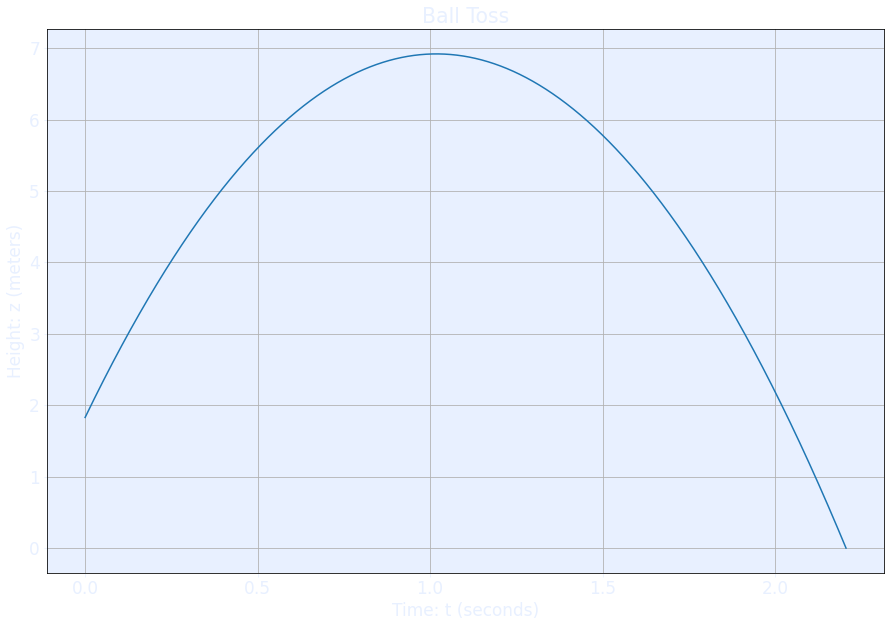

In [17]:

# These values I took from this Wikipedia page:
# https://en.wikipedia.org/wiki/Gravity_of_Earth
# This gave the nicest value of 
    

G = 6.67408e-11
R = 6.371e6
M = 5.9722e24

x0=0.
vx0=0.
y0=0.
vy0=0.
z0=6*12*25.4/1000 # Tossing the ball from 6 feet, which is the estimated height I would toss a ball.
vz0=10.

g=-G*M/R/R/R*R # gravitational acceleration

t_f=(-vz0-np.sqrt(vz0**2-2.*g*z0))/g #Time the ball will land

tend=t_f
t=0
h=0.0001

print(f"g = {g} m/s^2")
print(f"time_final= {t_f}s") #new

#  x   vx  y   vy  z  vz
y=[x0, vx0, y0, vy0, z0, vz0]
t_tot=[]

xp=[]
yp=[]
zp=[]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    t_tot=np.append(t_tot,t)
    y = rk4(t,h,y,6)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    zp=np.append(zp,y[4])
    t = t+h

print(f"Z height at time {t_f}s: : {zp[-1]}m")


plt.plot(t_tot,zp)
plt.title("Ball Toss")
plt.xlabel("Time: t (seconds)")
plt.ylabel("Height: z (meters)")
plt.grid()
plt.show()